# <center>L2 Computational Physics</center>
---

## Random Walks

This assignment will look at some properties of random walks.

In [1]:
import numpy
from matplotlib import pyplot as plt 

To do our work we will implement a walker class. When initialised a list of possible steps is populated. In one dimension it is

[+s] , [-s] 

where s is the step size, it defaults to 1 but can be set as an argument in the constructor. In two dimensions the steps list contains

[ +s , 0 ] , [ -s , 0 ] ,  [ 0 , +s ] , [ 0 , -s ]

At each step the current position of the walker, saved in `self.pos`, is updated by adding one of the possible steps. The function `pickStep` chooses randomly one of the possible steps. Use this function to implement the `doSteps` function that performs `n` steps and returns a `(n+1) x ndim` array representing the trajectory of the walker, including the starting point. 

In [2]:

class walker:
    def __init__(self,x0,ndim=1, step_size=1.0):
        self.pos=x0
        self.ndim=ndim
        self.possibleSteps=[]
        for i in range(ndim):
            step=numpy.zeros(ndim)
            step[i]= - step_size
            self.possibleSteps.append(numpy.array(step,dtype='f'))
            step[i]= + step_size
            self.possibleSteps.append(step.copy())
        self.npossible=len(self.possibleSteps)

    def pickStep(self):
        istep = numpy.random.choice(range(self.npossible))
        return self.possibleSteps[istep]
    
    #def move(self):
        #return self.pos + self.pickStep
       
    def doSteps(self,n):
        #positions=numpy.ndarray((n+1,self.ndim),dtype='f')
        positions = numpy.array(self.pos)
        for i in range(n):
            x = self.pickStep()
            pos = positions[-1] + x
            positions = numpy.vstack((positions, numpy.array(pos)))
        return positions


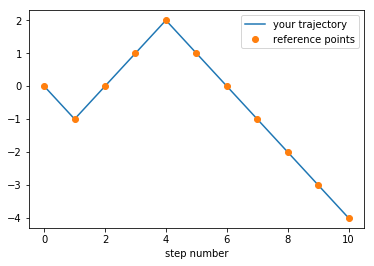

In [3]:
# this test is worth 2 marks
numpy.random.seed(1111)
w = walker(numpy.zeros(1))
pos_test = w.doSteps(10)
reference = [[ 0.], [-1.], [ 0.], [ 1.], [ 2.], [ 1.], [ 0.], [-1.], [-2.], [-3.], [-4.]]
assert len(pos_test)==11
# plots to help debugging
plt.plot(range(11),pos_test, label='your trajectory')
plt.plot(range(11),reference,'o', label='reference points')
plt.legend()
plt.xlabel('step number')
assert (pos_test == reference).all()

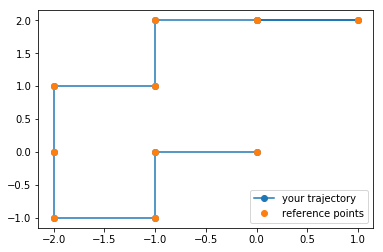

In [4]:
# this test is worth 5 marks
numpy.random.seed(1112)
w = walker(numpy.zeros(2), ndim=2)
pos_test = w.doSteps(10)
reference = numpy.array([[ 0.,  0.], [-1.,  0.], [-1., -1.], [-2., -1.], 
             [-2.,  0.], [-2.,  1.], [-1.,  1.], [-1.,  2.], 
             [ 0.,  2.], [ 1.,  2.], [ 0.,  2.]])
assert pos_test.shape == (11,2)
# plots to help debugging
plt.plot(pos_test[:,0], pos_test[:,1],'-o', label='your trajectory')
plt.plot(reference[:,0],reference[:,1],'o', label='reference points')
plt.legend()
assert (pos_test == reference).all()

This is a plot to visualise trajectories. Use it to convince yourself that you get different trajectories.

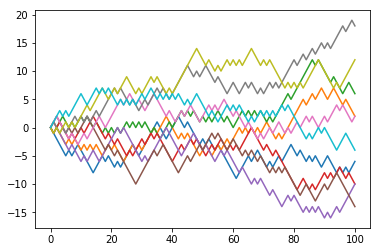

In [5]:
nsteps = 100
for i in range(10):
    w = walker(numpy.zeros(1))
    ys = w.doSteps(nsteps)
    plt.plot(range(nsteps+1),ys)

**Task 1**

Make a plot of average position and average squared position of 100 1D walkers using 1000 steps. Your plot needs a legend, title and labels. [5 marks]


Text(0.5,1,'Plot to show average position and average squared position for 1D Random Walk')

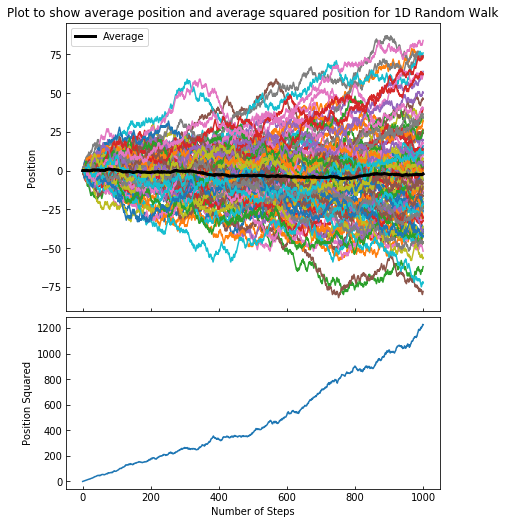

In [6]:
nsteps = 1000
ndim = 1
nwalkers = 100

left, width = 0.1, 0.65
bottom, height = 0.1, 0.5
spacing = 0.005


rect_av = [left, bottom + 0.31, width, height]
rect_avsquare = [left, bottom, width, 0.3]



plt.figure(figsize=(8, 8))
ax_av = plt.axes(rect_av)
ax_av.tick_params(direction='in', labelbottom=False)
ax_avsquare = plt.axes(rect_avsquare)
ax_avsquare.tick_params(direction='in', labelbottom=True, labelleft=True)


path = 0
pathsquare = 0
for i in range(nwalkers):
    w = walker(numpy.zeros(1))
    ys = numpy.array(w.doSteps(nsteps))
    ax_av.plot(range(nsteps+1),ys)
    path = path + ys
    pathsquare = pathsquare + ys*ys

path = path/nwalkers
pathsquare = pathsquare/nwalkers
ax_av.plot(path, color = 'black',linewidth=3, label = 'Average')
ax_av.set_ylabel('Position')
ax_av.legend()

ax_avsquare.plot(pathsquare)
ax_avsquare.set_ylabel('Position Squared')
ax_avsquare.set_xlabel('Number of Steps')
ax_av.set_title('Plot to show average position and average squared position for 1D Random Walk')

**Task 2**

Make a plot to show that the average squared distance scaling is independent of the dimension in which the walker moves. Use 100 steps and 400 walkers and use $D=1,2,3,4$. The plot should have a title, legend and labels. [5 marks]


Text(0.5,1,'Plot to show variation of position squared with number of steps for random walker in different dimensions')

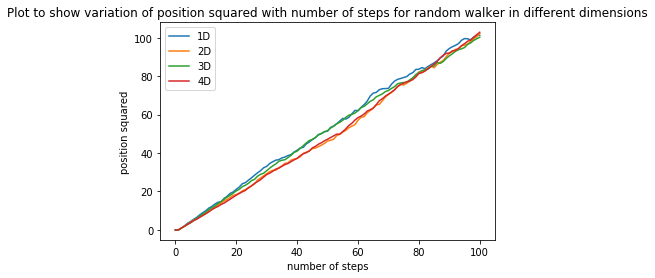

In [7]:
nsteps = 100
nwalkers = 400
dimensions = [1,2,3,4]

for j in range(1,5): 
    pathsquare = 0
    for i in range(nwalkers):
        x = 0
        w = walker(numpy.zeros(j), ndim = j)
        ys = numpy.array(w.doSteps(nsteps))
        for k in range(nsteps):
            y = numpy.linalg.norm(ys[k,:])
            x = numpy.vstack((x,y))
        pathsquare = pathsquare + x*x
    pathsquare = pathsquare/nwalkers
    plt.plot(pathsquare)
plt.ylabel('position squared')
plt.xlabel('number of steps')
plt.legend(('1D','2D','3D','4D'))
plt.title('Plot to show variation of position squared with number of steps for random walker in different dimensions')
        
    

## 2D walkers

Use 1000 walkers randomly distributed in the unit square (the positions are given in the array `rand_pos`) simulate the diffusion of particles with step size 0.05. Make a plot of the position of the walkers after 10, 100 and 500 steps. The plots should have labels and titles.

Tip: Use `plt.scatter` and consider using its `alpha` option to make you plot look nicer. [6 marks]


Text(0.5,1,'500 steps')

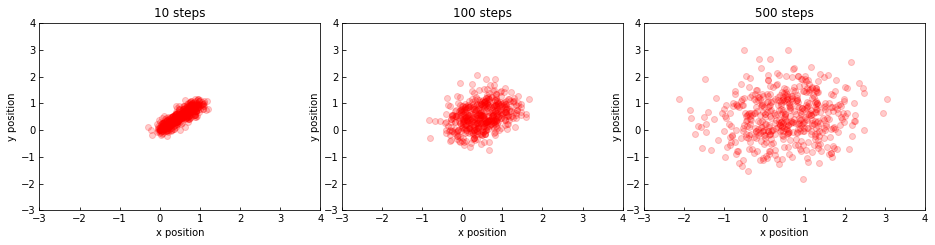

<Figure size 720x432 with 0 Axes>

In [10]:
ndim=2
nwalkers=500

rand_pos = numpy.random.uniform(size=(nwalkers, ndim))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
rect_10 = [left, bottom, width, height]
rect_100 = [left+width+0.05, bottom, width, height]
rect_500 = [left+width*2+0.1, bottom,width,height]


ax_10 = plt.axes(rect_10)
ax_10.tick_params(direction='in', labelbottom=True)
ax_100 = plt.axes(rect_100)
ax_100.tick_params(direction='in', labelbottom=True)
ax_500 = plt.axes(rect_500)
ax_500.tick_params(direction='in', labelbottom=True)

plt.figure(figsize=(10,6))
for j in range(nwalkers-1):
    w = walker(rand_pos[j,:],ndim=2,step_size=0.05)
    ys = w.doSteps(500)
    ax_10.scatter(ys[10,0],ys[10,1],color='red',alpha=0.2)
    ax_100.scatter(ys[100,0],ys[100,1],color='red',alpha=0.2)
    ax_500.scatter(ys[500,0],ys[500,1],color='red',alpha=0.2)

ax_10.set_ylim(-3,4)
ax_100.set_ylim(-3,4)
ax_500.set_ylim(-3,4)
ax_10.set_xlim(-3,4)
ax_100.set_xlim(-3,4)
ax_500.set_xlim(-3,4)
ax_10.set_ylabel('y position')
ax_100.set_ylabel('y position')
ax_500.set_ylabel('y position')
ax_10.set_xlabel('x position')
ax_100.set_xlabel('x position')
ax_500.set_xlabel('x position')
ax_10.set_title('10 steps')
ax_100.set_title('100 steps')
ax_500.set_title('500 steps')